In [7]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
import sys
import os

# Ajouter le dossier "scr/" à PYTHONPATH
project_root = os.path.abspath("../scr")  # adapte si nécessaire
if project_root not in sys.path:
    sys.path.append(project_root)

# Tu peux maintenant importer utils.py
from utils import get_face_landmarks, load_model

I0000 00:00:1752044457.188212 1533761 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1752044457.199540 1534390 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1752044457.204731 1534392 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


# FER2013 dataset

/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/happy/Training_50449107.jpg
shape:  (48, 48, 3)
/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/sad/Training_86437620.jpg
shape:  (48, 48, 3)
/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/fear/Training_19995150.jpg
shape:  (48, 48, 3)
/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/surprise/Training_53079763.jpg
shape:  (48, 48, 3)
/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/neutral/Training_27707774.jpg
shape:  (48, 48, 3)
/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/angry/Training_35668808.jpg
shape:  (48, 48, 3)
/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/disgust/Training_2580532.jpg
shape:  (48, 48, 3)


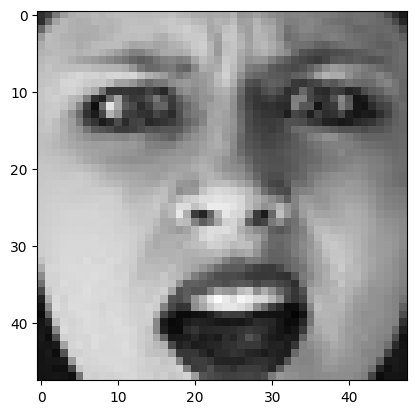

In [9]:
data_path = os.path.expanduser("~/.cache/kagglehub/datasets/msambare/fer2013/versions/1") 

# extract landmarks for each image
for emotion_idx, emotion in enumerate(os.listdir(os.path.join(data_path, "train/"))):
    for img_name in os.listdir(os.path.join(data_path, f"train/{emotion}")):
        img_path = os.path.join(data_path, f"train/{emotion}/{img_name}")
        print(img_path)
        img = cv2.imread(img_path)
        plt.imshow(img)
        print("shape: ", img.shape)
        
        break

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

# Initialiser MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

# Dataset path
data_path = os.path.expanduser("~/.cache/kagglehub/datasets/msambare/fer2013/versions/1") 

# Extraire une seule image pour test
# for _ in range(5):
for emotion_idx, emotion in enumerate(os.listdir(os.path.join(data_path, "train/"))):
    for img_name in os.listdir(os.path.join(data_path, f"train/{emotion}")):
        img_path = os.path.join(data_path, f"train/{emotion}/{img_name}")
        print(f"Image: {img_path}")

        # Chargement et conversion
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # Détection des landmarks
        results = face_mesh.process(img_rgb)

        # Affichage image + landmarks
        plt.imshow(img_rgb)
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                for lm in face_landmarks.landmark:
                    x, y = int(lm.x * w), int(lm.y * h)
                    plt.scatter(x, y, c='lime', s=1)

        plt.title(f"Emotion: {emotion}")
        plt.axis('off')
        plt.show()

        break  # Pour ne prendre qu'une seule image par catégorie
    # break  # Supprime ce `break` pour tester toutes les classes

In [ ]:
import numpy as np

data = np.loadtxt("data/dataset.txt")
print("Shape:", data.shape)

X = data[:, :-1]  # landmarks (shape: [n_samples, 1404])
y = data[:, -1]   # labels (shape: [n_samples])
print(np.unique(y))

Shape: (28709, 1405)
21.0


# Affectnet datset

I0000 00:00:1752068941.930919 1927306 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1752068941.944298 1928104 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1752068941.948598 1928104 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1752068941.951496 1928108 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


Image: /Users/kraligan/.cache/kagglehub/datasets/mstjebashazida/affectnet/versions/1/train/happy/ffhq_2508.png


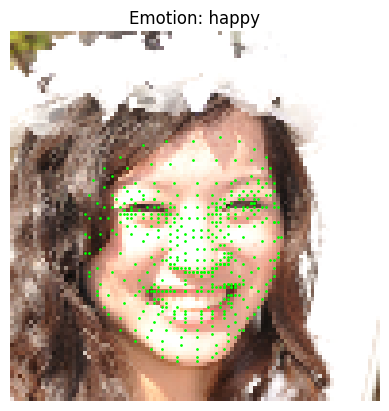

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

# Initialiser MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

# Dataset path
data_path = os.path.expanduser("~/.cache/kagglehub/datasets/mstjebashazida/affectnet/versions/1")

# Extraire une seule image pour test
for emotion_idx, emotion in enumerate(os.listdir(os.path.join(data_path, "train/"))):
    for img_name in os.listdir(os.path.join(data_path, f"train/{emotion}")):
        img_path = os.path.join(data_path, f"train/{emotion}/{img_name}")
        print(f"Image: {img_path}")

        # Chargement et conversion
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # Détection des landmarks
        results = face_mesh.process(img_rgb)

        # Affichage image + landmarks
        plt.imshow(img_rgb)
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                for lm in face_landmarks.landmark:
                    x, y = int(lm.x * w), int(lm.y * h)
                    plt.scatter(x, y, c='lime', s=1)

        plt.title(f"Emotion: {emotion}")
        plt.axis('off')
        plt.show()

        break  # Pour ne prendre qu'une seule image par catégorie
    break  # Supprime ce `break` pour tester toutes les classes

In [ ]:
import numpy as np

data = np.loadtxt("data/dataset_Affectnet.txt")
print("Shape:", data.shape)

X = data[:, :-1]  # landmarks (shape: [n_samples, 1404])
y = data[:, -1]   # labels (shape: [n_samples])
print(np.unique(y))

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[0][0:20])

In [ ]:
import numpy as np

data = np.loadtxt("data/dataset_Affectnet_balanced.txt")
print("Shape:", data.shape)

X = data[:, :-1]  # landmarks (shape: [n_samples, 1404])
y = data[:, -1]   # labels (shape: [n_samples])
print(np.unique(y))

### Test on personnal photos

In [ ]:
import os
import cv2
import numpy as np
import joblib
from utils import get_face_landmarks, load_model
import mediapipe as mp

model = load_model('../model/affectnet_opti_2/best_model.h5')
scaler = joblib.load('../model/affectnet_opti/scaler_affectnet.pkl')
emotion_classes = ['fear', 'happy', 'neutral', 'sad', 'surprise']

img_dir = "../data/Photos_test"
img_paths = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.png'))]

mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=(0, 255, 0))

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

for img_path in img_paths:
    img = cv2.imread(img_path)
    if img is None:
        print(f"Image introuvable : {img_path}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(img_rgb)

    if not results.multi_face_landmarks:
        print(f"Aucun visage détecté pour {img_path}")
        continue

    landmarks = get_face_landmarks(img_path)
    if np.sum(landmarks) == 0:
        continue

    input_data = scaler.transform([landmarks])
    prediction = model.predict(input_data, verbose=0)
    class_id = np.argmax(prediction)
    confidence = np.max(prediction)
    emotion = emotion_classes[class_id]

    annotated = img.copy()
    for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=annotated,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=drawing_spec,
            connection_drawing_spec=drawing_spec
        )

    text = f"{emotion} ({confidence:.2f})"
    cv2.putText(annotated, text, (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

    cv2.imshow("Image avec prédiction", annotated)
    key = cv2.waitKey(0)
    if key == ord('q'):
        break

cv2.destroyAllWindows()